<a href="https://colab.research.google.com/github/J-a-y-a-shree/adaptiveKsc/blob/main/endsem8project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 1. Load the CSV (adjust the path as needed)
df = pd.read_csv(r'/content/Final_Dataset10k.csv')

# 2. Peek at the first few rows
print("=== HEAD ===")
print(df.head(), "\n")

# 3. DataFrame info (types & non-null counts)
print("=== INFO ===")
print(df.info(), "\n")

# 4. Summary statistics
print("=== DESCRIBE ===")
print(df.describe(), "\n")

# 5. Count missing values per column
print("=== MISSING VALUES ===")
print(df.isnull().sum(), "\n")

# 6. Quick sanity check: negative irradiance?
if 'Irradiance' in df.columns:
    neg = (df['Irradiance'] < 0).sum()
    print(f"Negative Irradiance entries: {neg}")
# Assume you’ve already done: import pandas as pd and df = pd.read_csv(...)

# 1. Record original row count
n0 = len(df)

# 2. Drop any rows with missing values
df_clean = df.dropna()

# 3. Drop exact duplicate rows
df_clean = df_clean.drop_duplicates()

# 4. (Optional) Re‑check for negative Irradiance just to be safe
n_neg_irr = (df_clean['Irradiance'] < 0).sum()

# 5. Print cleanup summary
print(f"Original rows:            {n0}")
print(f"After dropping NaNs:      {len(df_clean)}  (removed {n0 - len(df_clean)})")
print(f"After dropping duplicates: {len(df_clean)}  (removed 0 since we applied drop_duplicates on df_clean)")
print(f"Rows with Irradiance<0:    {n_neg_irr}")


=== HEAD ===
   Irradiance  AmbientTemp  rload  cload    fc  f_samp  Inductor  Capacitor  \
0        1000           15  0.001  0.001  5000   10000    0.0007    0.00003   
1        1000           15  0.001  0.001  5000   10000    0.0007    0.00004   
2        1000           15  0.001  0.001  5000   10000    0.0010    0.00003   
3        1000           15  0.001  0.001  5000   10000    0.0010    0.00004   
4        1000           15  0.001  0.001  5000   20000    0.0007    0.00003   

     Vpv_avg   Ipv_avg  ...  VoltageRipple_rms  CurrentRipple_pp  \
0  26.981708  7.645878  ...           0.001105          1.842528   
1  26.981708  7.645878  ...           0.001105          1.842086   
2  26.991009  7.645179  ...           0.000775          1.291154   
3  26.991009  7.645179  ...           0.000775          1.290844   
4  34.165074  0.339067  ...           0.000471          1.164506   

   CurrentRipple_rms        dV        dP  Efficiency        P_in        Pmpp  \
0           0.921181 -0

In [2]:
# Save the cleaned dataset
output_path = r'/content/Final_Dataset10k_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")


Cleaned data saved to: /content/Final_Dataset10k_clean.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load cleaned data
clean_path = r'/content/Final_Dataset10k_clean.csv'
df = pd.read_csv(clean_path)

# 2. Define feature & target columns
feature_cols = [
    'Irradiance', 'AmbientTemp', 'rload', 'cload',
    'Inductor', 'Capacitor', 'k_sc'
]
target_cols = [
    'VoltageRipple_pp', 'VoltageRipple_rms',
    'CurrentRipple_pp','CurrentRipple_rms',
    'TimeDelay', 'Efficiency'
]

# 3. Split into features (X) and targets (y)
X = df[feature_cols]
y = df[target_cols]

# 4. First split off 20% for val+test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

# 5. Then split that 20% equally into val & test (10% each of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True
)

# 6. Print shapes to confirm
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)

# 7. (Optional) Save each split as combined CSV
train_df = pd.concat([X_train, y_train], axis=1)
val_df   = pd.concat([X_val,   y_val],   axis=1)
test_df  = pd.concat([X_test,  y_test],  axis=1)

train_df.to_csv(r'/content/train_set.csv', index=False)
val_df.to_csv( r'/content/val_set.csv',   index=False)
test_df.to_csv(r'/content/test_set.csv',  index=False)

print("\nSaved splits to train_set.csv, val_set.csv, test_set.csv")


X_train: (8457, 7) y_train: (8457, 6)
X_val:   (1057, 7) y_val:   (1057, 6)
X_test:  (1058, 7) y_test:  (1058, 6)

Saved splits to train_set.csv, val_set.csv, test_set.csv


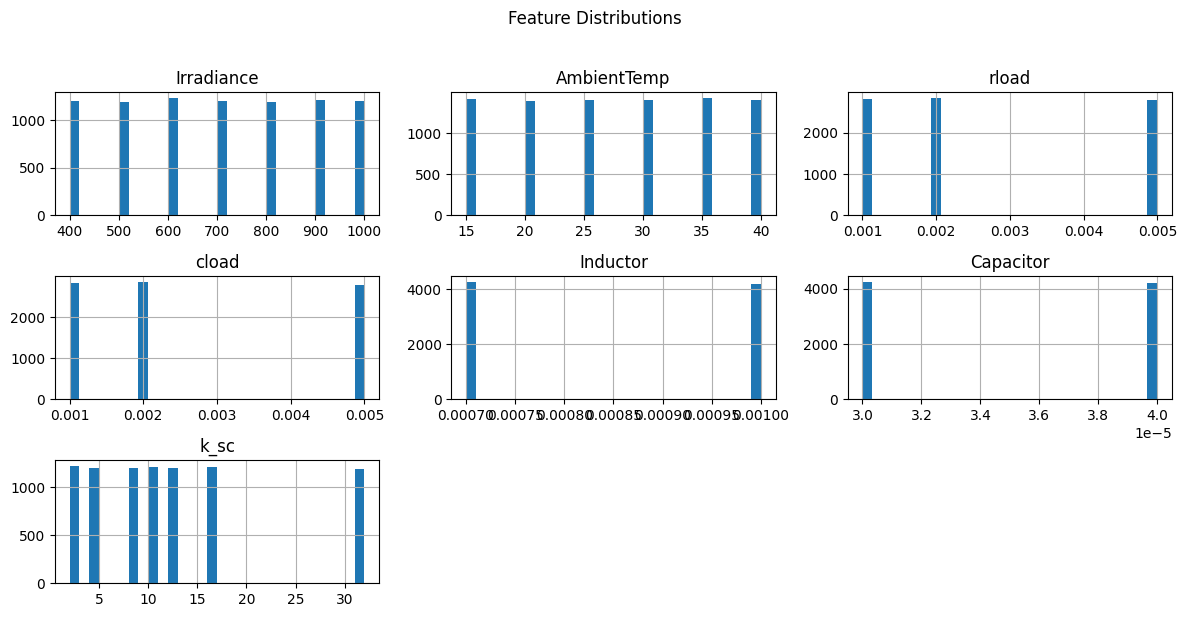

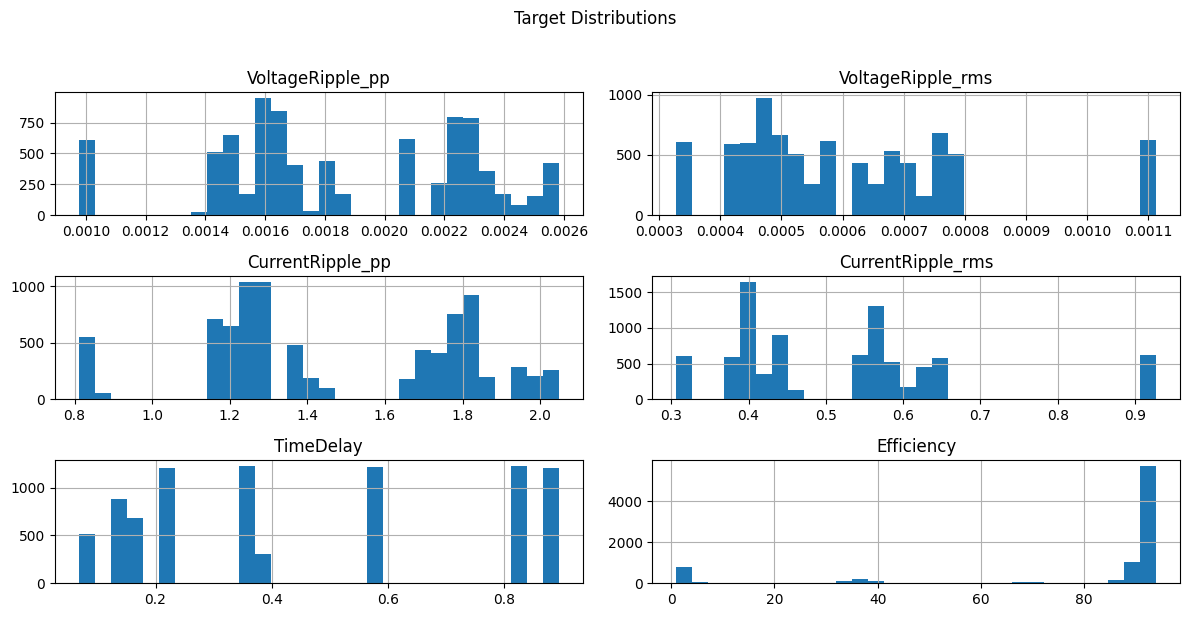

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the training set
train_df = pd.read_csv(
    r'/content/train_set.csv'
)

# 2. Define your feature & target columns
feature_cols = [
    'Irradiance', 'AmbientTemp', 'rload', 'cload',
    'Inductor', 'Capacitor', 'k_sc'
]
target_cols = [
    'VoltageRipple_pp', 'VoltageRipple_rms',
    'CurrentRipple_pp','CurrentRipple_rms',
    'TimeDelay', 'Efficiency'
]

# 3. Plot feature distributions
train_df[feature_cols].hist(bins=30, figsize=(12, 6))
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

# 4. Plot target distributions
train_df[target_cols].hist(bins=30, figsize=(12, 6))
plt.suptitle('Target Distributions', y=1.02)
plt.tight_layout()
plt.show()


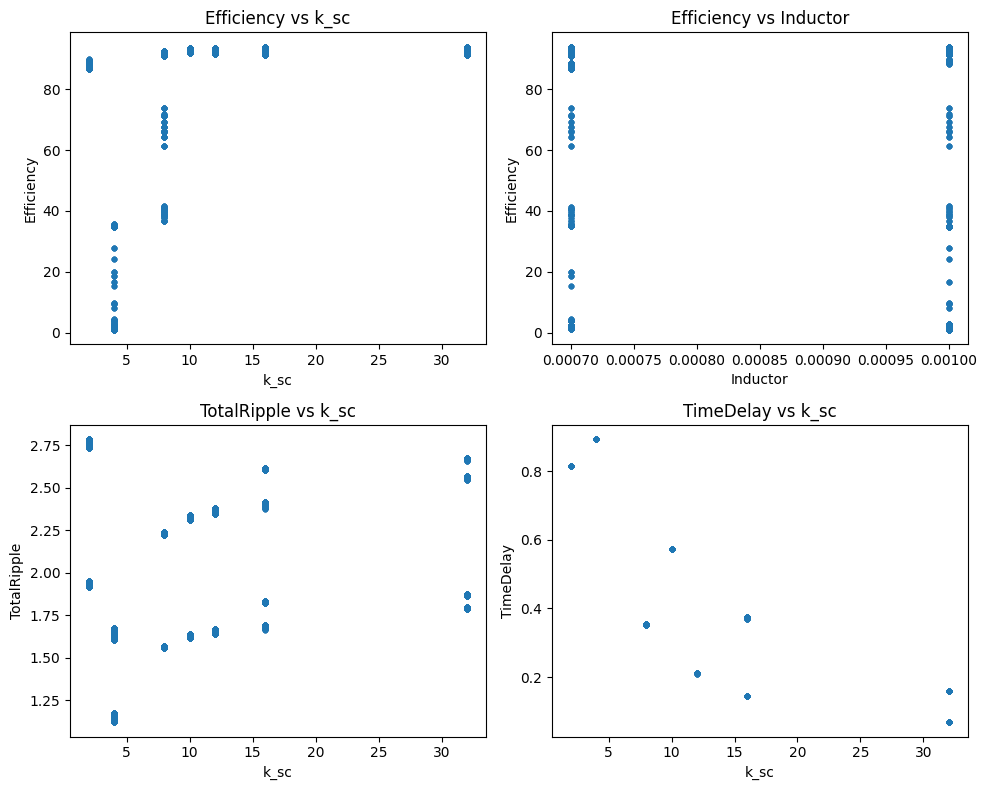

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load train set
df = pd.read_csv(r'/content/train_set.csv')

# 2. Compute a composite ripple score
df['TotalRipple'] = (
    df['VoltageRipple_pp'] + df['VoltageRipple_rms'] +
    df['CurrentRipple_pp'] + df['CurrentRipple_rms']
)

# 3. Define plots
pairs = [
    ('k_sc',      'Efficiency'),
    ('Inductor',  'Efficiency'),
    ('k_sc',      'TotalRipple'),
    ('k_sc',      'TimeDelay')
]

# 4. Plot each scatter
plt.figure(figsize=(10, 8))
for i, (x_col, y_col) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[x_col], df[y_col], s=10, alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load
train = pd.read_csv(r'/content/train_set.csv')
val   = pd.read_csv(r'/content/val_set.csv')

# 2. Define columns
feature_cols = [
    'Irradiance','AmbientTemp','rload','cload',
    'Inductor','Capacitor','k_sc'
]
target_cols = [
    'VoltageRipple_pp','VoltageRipple_rms',
    'CurrentRipple_pp','CurrentRipple_rms',
    'TimeDelay','Efficiency'
]

X_train = train[feature_cols].values
y_train = train[target_cols].values
X_val   = val[feature_cols].values
y_val   = val[target_cols].values

# 3. Fit scalers
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

# 4. Transform
X_train_scaled = scaler_X.transform(X_train)
X_val_scaled   = scaler_X.transform(X_val)
y_train_scaled = scaler_y.transform(y_train)
y_val_scaled   = scaler_y.transform(y_val)

# 5. Confirm shapes and zero mean/unit variance
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled   shape:", X_val_scaled.shape)
print("y_train_scaled mean/var:",
      y_train_scaled.mean(axis=0).round(3),
      y_train_scaled.var(axis=0).round(3))


X_train_scaled shape: (8457, 7)
X_val_scaled   shape: (1057, 7)
y_train_scaled mean/var: [-0.  0. -0.  0.  0. -0.] [1. 1. 1. 1. 1. 1.]


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# 1. Build the model
model = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),  # 7 features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train_scaled.shape[1], activation='linear')  # 6 targets
])

# 2. Compile
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 3. Show the architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,222 (12.59 KB)

 Trainable params: 3,222 (12.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
265/265 - 3s - 13ms/step - loss: 0.5556 - mae: 0.5343 - val_loss: 0.3993 - val_mae: 0.4219
Epoch 2/200
265/265 - 1s - 3ms/step - loss: 0.3692 - mae: 0.4036 - val_loss: 0.3265 - val_mae: 0.3739
Epoch 3/200
265/265 - 1s - 5ms/step - loss: 0.2479 - mae: 0.3264 - val_loss: 0.1356 - val_mae: 0.2457
Epoch 4/200
265/265 - 1s - 4ms/step - loss: 0.0795 - mae: 0.1873 - val_loss: 0.0484 - val_mae: 0.1470
Epoch 5/200
265/265 - 1s - 2ms/step - loss: 0.0403 - mae: 0.1341 - val_loss: 0.0347 - val_mae: 0.1218
Epoch 6/200
265/265 - 1s - 2ms/step - loss: 0.0311 - mae: 0.1158 - val_loss: 0.0284 - val_mae: 0.1102
Epoch 7/200
265/265 - 1s - 2ms/step - loss: 0.0256 - mae: 0.1044 - val_loss: 0.0242 - val_mae: 0.1020
Epoch 8/200
265/265 - 1s - 2ms/step - loss: 0.0210 - mae: 0.0948 - val_loss: 0.0197 - val_mae: 0.0923
Epoch 9/200
265/265 - 1s - 2ms/step - loss: 0.0171 - mae: 0.0864 - val_loss: 0.0156 - val_mae: 0.0808
Epoch 10/200
265/265 - 1s - 2ms/step - loss: 0.0135 - mae: 0.0779 - val_loss: 0.0

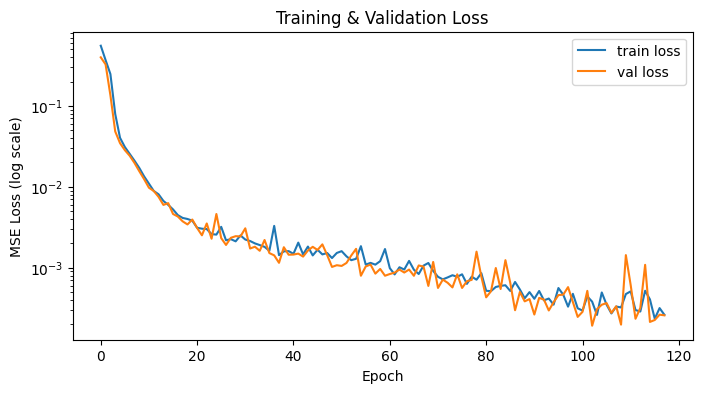

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Set up EarlyStopping
es = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# 2. Fit the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# 3. Plot loss curves
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss (log scale)')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from tensorflow.keras.models import load_model
import joblib

# 1. Reload validation data & scalers
val   = pd.read_csv(r'/content/val_set.csv')
X_val = val[feature_cols].values
y_val = val[target_cols].values

scaler_X = joblib.load(r'/content/scaler_X.pkl')
scaler_y = joblib.load(r'/content/scaler_y.pkl')

X_val_s = scaler_X.transform(X_val)

# 2. Predict
y_pred_s = model.predict(X_val_s)
y_pred   = scaler_y.inverse_transform(y_pred_s)

# 3. Compute RMSE per target
for i, col in enumerate(target_cols):
    rmse = mean_squared_error(y_val[:, i], y_pred[:, i], squared=False)
    print(f"{col:20s} RMSE = {rmse:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/scaler_X.pkl'

In [10]:
import joblib

# adjust paths as desired
joblib.dump(scaler_X, r'/content/scaler_X.pkl')
joblib.dump(scaler_y, r'/content/scaler_y.pkl')
print("Scalers saved.")


Scalers saved.


In [11]:
model.save(r'/content/mppt_surrogate.h5')
print("Model saved.")


Model saved.


In [12]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# 1. Load the validation split
val = pd.read_csv(r'/content/val_set.csv')
X_val = val[feature_cols].values
y_val = val[target_cols].values

# 2. Scale features, predict, then inverse‐scale outputs
X_val_s = scaler_X.transform(X_val)
y_pred_s = model.predict(X_val_s)
y_pred   = scaler_y.inverse_transform(y_pred_s)

# 3. Compute and print RMSE for each target
for i, col in enumerate(target_cols):
    # Calculate MSE then take the square root for RMSE
    mse = mean_squared_error(y_val[:, i], y_pred[:, i]) # Remove squared argument
    rmse = np.sqrt(mse)
    print(f"{col:20s} RMSE = {rmse:.4f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
VoltageRipple_pp     RMSE = 0.0000
VoltageRipple_rms    RMSE = 0.0000
CurrentRipple_pp     RMSE = 0.0040
CurrentRipple_rms    RMSE = 0.0017
TimeDelay            RMSE = 0.0045
Efficiency           RMSE = 0.6038


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Reload validation data
val = pd.read_csv(r'/content/val_set.csv')
X_val = val[feature_cols].values
y_val = val[target_cols].values

# 2. Scale, predict, then inverse‑scale
X_val_s = scaler_X.transform(X_val)
y_pred_s = model.predict(X_val_s)
y_pred   = scaler_y.inverse_transform(y_pred_s)

# 3. Compute & print RMSE per target
for i, col in enumerate(target_cols):
    # Calculate MSE then take the square root for RMSE
    mse = mean_squared_error(y_val[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    print(f"{col:20s} RMSE = {rmse:.4f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
VoltageRipple_pp     RMSE = 0.0000
VoltageRipple_rms    RMSE = 0.0000
CurrentRipple_pp     RMSE = 0.0040
CurrentRipple_rms    RMSE = 0.0017
TimeDelay            RMSE = 0.0045
Efficiency           RMSE = 0.6038


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

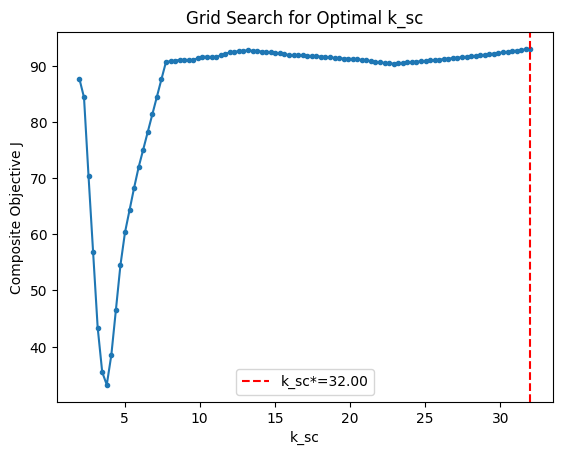

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load one example (first row of validation set)
val = pd.read_csv(r'/content/val_set.csv')
feature_cols = ['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor','k_sc']
X_new = val[feature_cols].iloc[0].values[:-1]  # drop its original k_sc

# 2. Define weights
w1, w2, alpha = 1.0, 1.0, 0.5

# 3. Objective function
def objective(k_sc, X_raw):
    # a) build input vector and scale
    inp = np.hstack([X_raw, [k_sc]]).reshape(1, -1)
    inp_s = scaler_X.transform(inp)
    # b) predict & inverse‐scale
    y_s = model.predict(inp_s)
    y    = scaler_y.inverse_transform(y_s)[0]
    # c) extract metrics
    total_ripple = y[0] + y[1] + y[2] + y[3]
    time_delay   = y[4]
    efficiency   = y[5]
    # d) composite score (higher is better)
    return efficiency - alpha*(w1*total_ripple + w2*time_delay)

# 4. Grid search
k_vals = np.linspace(2, 32, 100)
scores = [objective(k, X_new) for k in k_vals]
best_idx = int(np.argmax(scores))
best_k   = k_vals[best_idx]

print(f"Optimal k_sc ≃ {best_k:.2f} with J = {scores[best_idx]:.3f}")

# 5. (Optional) Plot J vs k_sc
plt.plot(k_vals, scores, marker='.')
plt.xlabel('k_sc')
plt.ylabel('Composite Objective J')
plt.title('Grid Search for Optimal k_sc')
plt.axvline(best_k, color='red', linestyle='--', label=f'k_sc*={best_k:.2f}')
plt.legend()
plt.show()


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3307/3307 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Avg change at k_sc* vs original:
  Efficiency : 15.1746
  TotalRipple: 0.0786
  TimeDelay  : -0.1324


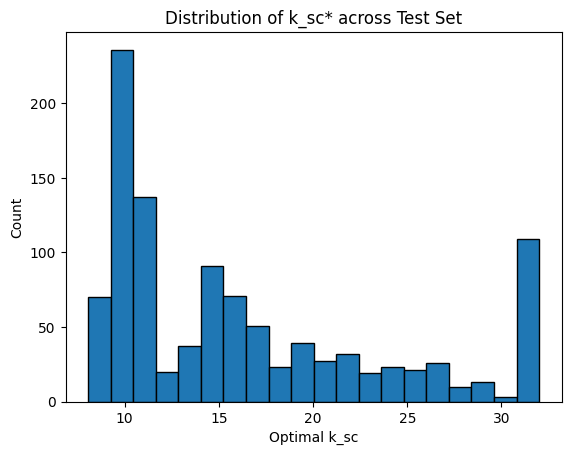

In [15]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1) Install dependencies (execute if needed)
!pip install -q joblib tensorflow

# 2) File paths in Colab
SCALER_X  = '/content/scaler_X.pkl'
SCALER_Y  = '/content/scaler_y.pkl'
MODEL_H5  = '/content/mppt_surrogate.h5'
TEST_CSV  = '/content/test_set.csv'

# 3) Load test set, scalers & model (compile=False to skip restoring metrics)
test_df   = pd.read_csv(TEST_CSV)
scaler_X  = joblib.load(SCALER_X)
scaler_y  = joblib.load(SCALER_Y)
model     = load_model(MODEL_H5, compile=False)

# 4) Define feature and target columns
feature_cols = ['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor','k_sc']
target_cols  = ['VoltageRipple_pp','VoltageRipple_rms',
                'CurrentRipple_pp','CurrentRipple_rms',
                'TimeDelay','Efficiency']

# 5) Prepare data
X_all = test_df[feature_cols].values
n     = X_all.shape[0]

# 6) Grid search parameters
k_vals = np.linspace(2, 32, 100)
w1, w2, alpha = 1.0, 1.0, 0.5

# 7) Objective function (vectorized)
def compute_J(Y):
    total_ripple = Y[:,0] + Y[:,1] + Y[:,2] + Y[:,3]
    time_delay   = Y[:,4]
    eff          = Y[:,5]
    return eff - alpha*(w1*total_ripple + w2*time_delay)

# 8) Predict original performance for all samples
Y0_s  = model.predict(scaler_X.transform(X_all))
Y0    = scaler_y.inverse_transform(Y0_s)

# 9) Build candidate grid for all samples at once
X_raw = X_all[:,:-1]
X_rep = np.repeat(X_raw, len(k_vals), axis=0)
K_tile = np.tile(k_vals, n).reshape(-1,1)
X_cand = np.hstack([X_rep, K_tile])

# 10) Predict all candidates in one batch
Yc_s = model.predict(scaler_X.transform(X_cand))
Yc   = scaler_y.inverse_transform(Yc_s)

# 11) Compute J and select best k_sc
J_all    = compute_J(Yc).reshape(n, len(k_vals))
idx_best = np.argmax(J_all, axis=1)
opt_ks    = k_vals[idx_best]
opt_perf  = Yc.reshape(n, len(k_vals), 6)[np.arange(n), idx_best, :]

# 12) Summarize average improvements
delta_eff = (opt_perf[:,5] - Y0[:,5]).mean()
delta_rip = (opt_perf[:,:4].sum(axis=1) - Y0[:,:4].sum(axis=1)).mean()
delta_del = (opt_perf[:,4] - Y0[:,4]).mean()

print("Avg change at k_sc* vs original:")
print(f"  Efficiency : {delta_eff:.4f}")
print(f"  TotalRipple: {delta_rip:.4f}")
print(f"  TimeDelay  : {delta_del:.4f}")

# 13) Plot distribution of optimal k_sc
plt.hist(opt_ks, bins=20, edgecolor='k')
plt.xlabel('Optimal k_sc')
plt.ylabel('Count')
plt.title('Distribution of k_sc* across Test Set')
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Create a DataFrame with features and the optimal k_sc
X_df = pd.DataFrame(X_all[:, :6], columns=[
    'Irradiance', 'AmbientTemp', 'rload', 'cload', 'Inductor', 'Capacitor'
])
X_df['k_sc_star'] = opt_ks  # Add optimal k_sc from grid search

# Save to file
X_df.to_csv('/content/optimal_k_sc_dataset.csv', index=False)
print(" Saved training dataset for direct k_sc predictor.")


 Saved training dataset for direct k_sc predictor.


In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# 1) Load the direct‑predictor dataset
df = pd.read_csv('/content/optimal_k_sc_dataset.csv')

# 2) Split into features & target
X = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']]
y = df['k_sc_star'].values

# 3) Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# 4) Instantiate & fit the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 4.1) Save the baseline RF model
joblib.dump(rf, '/content/rf_baseline.pkl')
print("Saved baseline Random Forest model to /content/rf_baseline.pkl")

# 5) Predict on the test set
y_pred = rf.predict(X_test)

# 6) Compute absolute metrics
mse      = mean_squared_error(y_test, y_pred)
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 7) Compute percentage‑relative errors (w.r.t. mean of y_test)
mean_true = y_test.mean()
rmse_pct  = (rmse_abs / mean_true) * 100
mae_pct   = (mae_abs / mean_true) * 100

# 8) Print results
print("\nRandom Forest k_sc* predictor performance:")
print(f"  RMSE (abs) = {rmse_abs:.4f}")
print(f"  MAE  (abs) = {mae_abs:.4f}")
print(f"  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")



Train samples: 846, Test samples: 212
Saved baseline Random Forest model to /content/rf_baseline.pkl

Random Forest k_sc* predictor performance:
  RMSE (abs) = 1.7878
  MAE  (abs) = 0.7254
  RMSE (%)   = 10.85% of mean k_sc*
  MAE  (%)   = 4.40% of mean k_sc*
  MAPE       = 4.44%
  R²         = 0.940


In [18]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# 1) Load the direct‑predictor dataset
df = pd.read_csv('/content/optimal_k_sc_dataset.csv')
X = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']]
y = df['k_sc_star'].values

# 2) Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# 3) Define RF parameter grid
param_grid = {
    'n_estimators':      [100, 200, 500],
    'max_depth':         [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4]
}

# 4) Grid search setup
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(
    rf, param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 5) Run grid search
grid.fit(X_train, y_train)

# 6) Retrieve best model and save
best_rf = grid.best_estimator_
print("Best RF params:", grid.best_params_)
joblib.dump(best_rf, '/content/rf_tuned.pkl')

# 7) Predictions on test set
y_pred   = best_rf.predict(X_test)

# 8) Compute absolute errors
# Replace line 53 with the following:
rmse_abs = np.sqrt(mean_squared_error(y_test, y_pred))
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 9) Compute percentage‑relative errors (w.r.t. mean of y_test)
mean_true = y_test.mean()
rmse_pct  = (rmse_abs / mean_true) * 100
mae_pct   = (mae_abs  / mean_true) * 100

# 10) Display performance
print("\nTuned Random Forest k_sc* predictor performance:")
print(f"  RMSE (abs) = {rmse_abs:.4f}")
print(f"  MAE  (abs) = {mae_abs:.4f}")
print(f"  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")


Train samples: 846, Test samples: 212
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest k_sc* predictor performance:
  RMSE (abs) = 1.7878
  MAE  (abs) = 0.7254
  RMSE (%)   = 10.85% of mean k_sc*
  MAE  (%)   = 4.40% of mean k_sc*
  MAPE       = 4.44%
  R²         = 0.940


In [19]:
# Step 5.3: Train & save the baseline MLP regressor for k_sc*

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

# 1) Load your k_sc* dataset
df = pd.read_csv('/content/optimal_k_sc_dataset.csv')
X = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']].values
y = df['k_sc_star'].values.reshape(-1, 1)

# 2) Split into train & test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# 3) Scale inputs and target
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train_s = scaler_X.transform(X_train)
X_test_s  = scaler_X.transform(X_test)
y_train_s = scaler_y.transform(y_train)

# 4) Build the baseline MLP model
mlp = Sequential([
    InputLayer(input_shape=(X_train_s.shape[1],)),  # 6 inputs
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')                  # predict k_sc*
])
mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5) Train with early stopping
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
mlp.fit(
    X_train_s, y_train_s,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# 6) Save the baseline MLP and its scalers
mlp.save('/content/mlp_baseline.keras')            # native Keras format
joblib.dump(scaler_X, '/content/scaler_X_baseline.pkl')
joblib.dump(scaler_y, '/content/scaler_y_baseline.pkl')
print("Saved baseline MLP to /content/mlp_baseline.keras and scalers to scaler_*_baseline.pkl")

# 7) Predict on the test set
y_pred_s = mlp.predict(X_test_s)
y_pred   = scaler_y.inverse_transform(y_pred_s).flatten()

# 8) Compute absolute error metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test.flatten() - y_pred) / y_test.flatten())) * 100

# 9) Convert RMSE/MAE to percentages of the mean k_sc*
mean_true = y_test.mean()
rmse_pct  = (rmse_abs / mean_true) * 100
mae_pct   = (mae_abs  / mean_true) * 100

# 10) Display all metrics
print("\nBaseline MLP k_sc* predictor performance:")
print(f"  RMSE  (abs) = {rmse_abs:.4f}")
print(f"  MAE   (abs) = {mae_abs:.4f}")
print(f"  RMSE  (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE   (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")


Train samples: 846, Test samples: 212
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


24/24 - 2s - 71ms/step - loss: 0.8231 - mae: 0.7200 - val_loss: 0.7748 - val_mae: 0.6719
Epoch 2/200
24/24 - 0s - 6ms/step - loss: 0.6359 - mae: 0.6114 - val_loss: 0.6623 - val_mae: 0.6258
Epoch 3/200
24/24 - 0s - 6ms/step - loss: 0.5614 - mae: 0.5781 - val_loss: 0.6352 - val_mae: 0.6152
Epoch 4/200
24/24 - 0s - 6ms/step - loss: 0.5302 - mae: 0.5392 - val_loss: 0.6298 - val_mae: 0.6192
Epoch 5/200
24/24 - 0s - 6ms/step - loss: 0.5059 - mae: 0.5279 - val_loss: 0.6304 - val_mae: 0.6301
Epoch 6/200
24/24 - 0s - 6ms/step - loss: 0.4862 - mae: 0.5195 - val_loss: 0.6185 - val_mae: 0.5876
Epoch 7/200
24/24 - 0s - 6ms/step - loss: 0.4768 - mae: 0.5081 - val_loss: 0.5813 - val_mae: 0.5908
Epoch 8/200
24/24 - 0s - 12ms/step - loss: 0.4553 - mae: 0.4898 - val_loss: 0.5746 - val_mae: 0.6039
Epoch 9/200
24/24 - 0s - 6ms/step - loss: 0.4384 - mae: 0.4837 - val_loss: 0.5729 - val_mae: 0.5926
Epoch 10/200
24/24 - 0s - 6ms/step - loss: 0.4272 - mae: 0.4726 - val_loss: 0.5704 - val_mae: 0.6017
Epoch 11/

In [20]:
# If TensorFlow or Keras‑Tuner aren’t installed, uncomment these lines:
!pip install -q tensorflow
!pip install -q keras-tuner

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from tensorflow import keras
from keras_tuner.tuners import Hyperband

# 1) Load and split data
df = pd.read_csv('/content/optimal_k_sc_dataset.csv')
X = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']].values
y = df['k_sc_star'].values.reshape(-1, 1)

Xtr, Xte, ytr, yte = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Scale features and target
scX = StandardScaler().fit(Xtr)
Xtr_s, Xte_s = scX.transform(Xtr), scX.transform(Xte)
scY = StandardScaler().fit(ytr)
ytr_s = scY.transform(ytr)

# 3) Define model‐building function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(Xtr_s.shape[1],)))
    for i in range(hp.Int('n_layers', 2, 5)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', 16, 256, step=16),
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(
                hp.Float('l2', 1e-5, 1e-2, sampling='log')
            )
        ))
        model.add(keras.layers.Dropout(
            rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        ))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('lr', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse'
    )
    return model

# 4) Hyperband search
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    factor=3,
    directory='ktuner',
    project_name='ksc_pred'
)
tuner.search(
    Xtr_s, ytr_s,
    validation_split=0.1,
    epochs=30,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)],
    verbose=1
)

# 5) Retrieve, save best model and scalers
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('/content/mlp_tuned_hyperband.keras')
joblib.dump(scX, '/content/scaler_X_hb.pkl')
joblib.dump(scY, '/content/scaler_y_hb.pkl')
print("Saved tuned MLP and scalers.")

# 6) Predict and compute metrics
y_pred_s = best_model.predict(Xte_s)
y_pred   = scY.inverse_transform(y_pred_s).flatten()
y_true   = yte.flatten()

mse = mean_squared_error(y_true, y_pred)  # Calculate MSE
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_true, y_pred)
r2       = r2_score(y_true, y_pred)
mape_pct = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_true = y_true.mean()
rmse_pct  = rmse_abs / mean_true * 100
mae_pct   = mae_abs  / mean_true * 100

# 7) Print all metrics
print("\nTuned Hyperband MLP k_sc* predictor performance:")
print(f"  RMSE  (abs) = {rmse_abs:.4f}")
print(f"  MAE   (abs) = {mae_abs:.4f}")
print(f"  RMSE  (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE   (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")


Trial 90 Complete [00h 00m 13s]
val_loss: 1.137487769126892

Best val_loss So Far: 0.14068250358104706
Total elapsed time: 00h 07m 56s
Saved tuned MLP and scalers.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Tuned Hyperband MLP k_sc* predictor performance:
  RMSE  (abs) = 2.9016
  MAE   (abs) = 1.8295
  RMSE  (%)   = 17.61% of mean k_sc*
  MAE   (%)   = 11.10% of mean k_sc*
  MAPE       = 10.51%
  R²         = 0.842


Shapes → Train: (846, 6), Val: (106, 6), Test: (106, 6)
[0]	train-rmse:7.33524	validation-rmse:7.11321
[1]	train-rmse:6.95613	validation-rmse:6.81676
[2]	train-rmse:6.83108	validation-rmse:6.76250
[3]	train-rmse:6.29184	validation-rmse:6.25099
[4]	train-rmse:5.85217	validation-rmse:5.86315
[5]	train-rmse:5.54980	validation-rmse:5.64902
[6]	train-rmse:5.40482	validation-rmse:5.57665
[7]	train-rmse:5.15185	validation-rmse:5.35006
[8]	train-rmse:4.80160	validation-rmse:5.01263
[9]	train-rmse:4.63377	validation-rmse:4.86625
[10]	train-rmse:4.52134	validation-rmse:4.81211
[11]	train-rmse:4.35213	validation-rmse:4.67660
[12]	train-rmse:4.22822	validation-rmse:4.60582
[13]	train-rmse:4.09243	validation-rmse:4.48900
[14]	train-rmse:3.84418	validation-rmse:4.24702
[15]	train-rmse:3.74213	validation-rmse:4.16415
[16]	train-rmse:3.60989	validation-rmse:4.08623
[17]	train-rmse:3.44434	validation-rmse:3.90691
[18]	train-rmse:3.35466	validation-rmse:3.84603
[19]	train-rmse:3.30312	validation-rmse:3.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:23] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


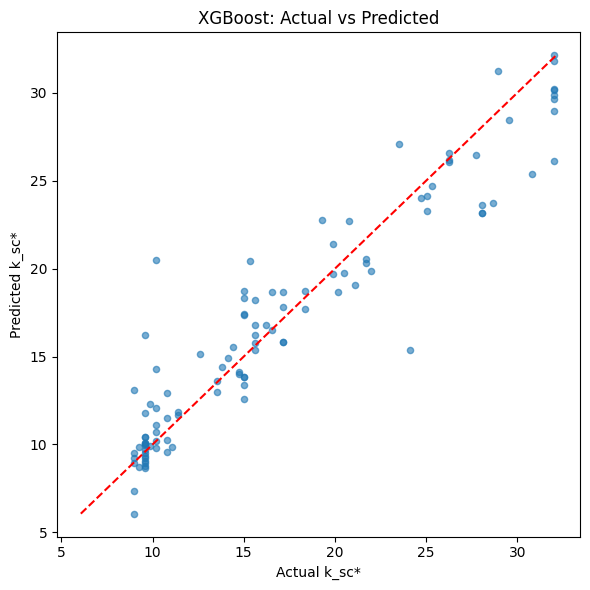

In [29]:
# 0) If needed, install/upgrade XGBoost so you have the native API:
# !pip install -q --upgrade xgboost joblib matplotlib pandas scikit-learn

import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1) Load full dataset
CSV      = '/content/optimal_k_sc_dataset.csv'
FEATURES = ['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']
TARGET   = 'k_sc_star'

df     = pd.read_csv(CSV)
X_full = df[FEATURES].values
y_full = df[TARGET].values

# 2) 80/10/10 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(f"Shapes → Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# 3) Create DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 4) Set up parameters
params = {
    'objective':      'reg:squarederror',
    'eval_metric':    'rmse',
    'max_depth':      6,
    'eta':            0.1,      # learning_rate
    'subsample':      0.8,
    'colsample_bytree': 0.8,
    'seed':           42
}

# 5) Train with early stopping
evallist = [(dtrain, 'train'), (dval, 'validation')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evallist,
    early_stopping_rounds=10,
    verbose_eval=True
)

# 6) Save the trained Booster
bst.save_model('/content/xgb_baseline.model')
print("Saved XGBoost Booster to /content/xgb_baseline.model")

# 7) Predict on the test set
y_pred = bst.predict(dtest)

# 8) Compute metrics
mse      = mean_squared_error(y_test, y_pred)
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_true = y_test.mean()
rmse_pct  = (rmse_abs / mean_true) * 100
mae_pct   = (mae_abs  / mean_true) * 100

print("\nXGBoost k_sc* predictor performance on test set:")
print(f"  RMSE (abs) = {rmse_abs:.4f}")
print(f"  MAE  (abs) = {mae_abs:.4f}")
print(f"  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")

# 9) Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, s=20)
_min, _max = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([_min, _max], [_min, _max], 'r--')
plt.xlabel('Actual k_sc*')
plt.ylabel('Predicted k_sc*')
plt.title('XGBoost: Actual vs Predicted')
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1) load & split 80/10/10
df = pd.read_csv('/content/optimal_k_sc_dataset.csv')
X, y = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']].values, df['k_sc_star'].values

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val,   X_test, y_val,   y_test = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=42)

# 2) convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 3) set your best hyperparams (from your RandomizedSearchCV)
params = {
    'objective':       'reg:squarederror',
    'eval_metric':     'rmse',
    'eta':             search.best_params_['learning_rate'],
    'max_depth':       search.best_params_['max_depth'],
    'subsample':       search.best_params_['subsample'],
    'colsample_bytree':search.best_params_['colsample_bytree'],
    'gamma':           search.best_params_['gamma'],
    'alpha':           search.best_params_['reg_alpha'],
    'lambda':          search.best_params_['reg_lambda'],
    'seed':            42
}

# 4) train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=search.best_params_['n_estimators'],
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# 5) save the Booster
bst.save_model('/content/xgb_tuned.model')
print("Saved native XGBoost model to /content/xgb_tuned.model")

# 6) evaluate on the test set
y_pred = bst.predict(dtest)
mse      = mean_squared_error(y_test, y_pred)
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_true = y_test.mean()
rmse_pct  = 100 * rmse_abs / mean_true
mae_pct   = 100 * mae_abs  / mean_true

print(f"""
XGBoost (native API, tuned) performance:
  RMSE (abs) = {rmse_abs:.4f}
  MAE  (abs) = {mae_abs:.4f}
  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*
  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*
  MAPE       = {mape_pct:.2f}%
  R²         = {r2:.3f}
""")


Saved native XGBoost model to /content/xgb_tuned.model

XGBoost (native API, tuned) performance:
  RMSE (abs) = 1.8961
  MAE  (abs) = 1.1954
  RMSE (%)   = 11.21% of mean k_sc*
  MAE  (%)   = 7.07% of mean k_sc*
  MAPE       = 7.70%
  R²         = 0.935



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:30:26] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [33]:
# If you need LightGBM & joblib, uncomment:
# !pip install -q lightgbm joblib

import pandas as pd
import numpy as np
import joblib
from lightgbm import LGBMRegressor
from lightgbm.callback import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# 1) Load & split data (80% train, then 10% val / 10% test)
CSV      = '/content/optimal_k_sc_dataset.csv'
FEATURES = ['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']
TARGET   = 'k_sc_star'

df     = pd.read_csv(CSV)
X_full = df[FEATURES].values
y_full = df[TARGET].values

# 80% train / 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)
# split temp into 50% val / 50% test → each 10% of total
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(f"Shapes → Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# 2) Instantiate LightGBM
lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 3) Fit with an early‐stopping callback
lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(period=0)     # turn off per‐iteration logs
    ]
)

# 4) Save the trained model
joblib.dump(lgb, '/content/lgb_baseline.pkl')
print("Saved LightGBM model to /content/lgb_baseline.pkl")

# 5) Predict & compute metrics on the test set
y_pred   = lgb.predict(X_test)
mse      = mean_squared_error(y_test, y_pred)
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# percentage relative to the mean k_sc*
mean_true = y_test.mean()
rmse_pct  = (rmse_abs / mean_true) * 100
mae_pct   = (mae_abs  / mean_true) * 100

print("\nLightGBM k_sc* predictor performance on test set:")
print(f"  RMSE (abs) = {rmse_abs:.4f}")
print(f"  MAE  (abs) = {mae_abs:.4f}")
print(f"  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")


Shapes → Train: (846, 6), Val: (106, 6), Test: (106, 6)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 6
[LightGBM] [Info] Start training from score 16.401103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# If you need to install:
# !pip install -q lightgbm scikit-learn joblib

import pandas as pd
import numpy as np
import joblib
from lightgbm import LGBMRegressor
from lightgbm.callback import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1) Load & split data (80/10/10)
df       = pd.read_csv('/content/optimal_k_sc_dataset.csv')
X_full   = df[['Irradiance','AmbientTemp','rload','cload','Inductor','Capacitor']].values
y_full   = df['k_sc_star'].values

X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# 2) Base estimator
base = LGBMRegressor(random_state=42, n_jobs=-1)

# 3) Parameter distributions
param_dist = {
    'n_estimators':    [100, 300, 500, 800],
    'learning_rate':   [0.01, 0.03, 0.05, 0.1],
    'max_depth':       [4, 6, 8, 10, None],
    'num_leaves':      [31, 50, 100, 200],
    'subsample':       [0.6, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0],
    'reg_alpha':       [0, 0.01, 0.1, 1],
    'reg_lambda':      [0, 0.01, 0.1, 1]
}

# 4) Wrap in RandomizedSearchCV
rs = RandomizedSearchCV(
    base,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=2
)

# 5) Fit with early stopping on the held‑out validation fold
rs.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
      early_stopping(stopping_rounds=20),
      log_evaluation(period=0)
    ]
)

print("Best parameters:", rs.best_params_)

# 6) Grab best model, save it, evaluate on test
best_lgb = rs.best_estimator_
joblib.dump(best_lgb, '/content/lgb_tuned.pkl')
print("Saved tuned LightGBM to /content/lgb_tuned.pkl")

y_pred   = best_lgb.predict(X_test)
mse      = mean_squared_error(y_test, y_pred)
rmse_abs = np.sqrt(mse)
mae_abs  = mean_absolute_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
mape_pct = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_true= y_test.mean()
rmse_pct = rmse_abs/mean_true*100
mae_pct  = mae_abs/mean_true*100

print("\nTuned LightGBM performance on test set:")
print(f"  RMSE (abs) = {rmse_abs:.4f}")
print(f"  MAE  (abs) = {mae_abs:.4f}")
print(f"  RMSE (%)   = {rmse_pct:.2f}% of mean k_sc*")
print(f"  MAE  (%)   = {mae_pct:.2f}% of mean k_sc*")
print(f"  MAPE       = {mape_pct:.2f}%")
print(f"  R²         = {r2:.3f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=800, num_leaves=200, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=800, num_leaves=200, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=300, num_leaves=100, reg_alpha=1, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=10, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=300, num_leaves=200, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=800, num_leaves=50, reg_alpha=1, reg_lambda=0.01, subsample=0.6; total time=   0.8s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=800, num_leaves=50, reg_alpha=1, reg_lambda=0.01, subsample=0.6; total time=   0.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=6, n_estimators=800, num_leaves=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=6, n_estimators=800, num_leaves=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=6, n_estimators=800, num_leaves=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, n_estimators=500, num_leaves=200, reg_alpha=1, reg_lambda=0.01, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=10, n_estimators=300, num_leaves=50, reg_alpha=0.01, reg_lambda=0, subsample=0.6; total time=   0.1s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=500, num_leaves=100, reg_alpha=0.1, reg_lambda=0.1, subsample=0.6; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=800, num_leaves=200, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=500, num_leaves=50, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=500, num_leaves=50, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.401461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=800, num_leaves=100, reg_alpha=0.01, reg_lambda=0, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.433161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=None, n_estimators=800, num_leaves=100, reg_alpha=0.01, reg_lambda=0, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 6
[LightGBM] [Info] Start training from score 16.368687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
